![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/b8be43cf89c540bfaf3831f2c8506614).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importación librerías
!pip install missingno
!pip install xgboost

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 330.3 kB/s eta 0:05:02
   ---------------------------------------- 0.1/99.8 MB 1.0 MB/s eta 0:01:37
   ---------------------------------------- 0.6/99.8 MB 3.7 MB/s eta 0:00:27
    --------------------------------------- 1.4/99.8 MB 6.8 MB/s eta 0:00:15
    --------------------------------------- 1.9/99.8 MB 7.9 MB/s eta 0:00:13
   - -------------------------------------- 2.6/99.8 MB 8.8 MB/s eta 0:00:12
   - -------------------------------------- 3.3/99.8 MB 10.1 MB/s eta 0:00:10
   - -------------------------------------- 4.0/99.8 MB 10.3 MB/s eta 0:00:10
   - -------------------------------------- 4.8/99.8 MB 11.3 MB/s eta 0:00:09
   -- ------------------------------------- 5.5/99.8 MB 11.7 MB/s eta 0:00:09
   -- ------------------------------------- 6.6/99.8 MB 12.8 MB/s eta 0:00:08
   ---

In [5]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [6]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [7]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [8]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [9]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033


In [10]:
dataTraining['State'].unique()



array([' FL', ' OH', ' TX', ' CO', ' ME', ' WA', ' CT', ' CA', ' LA',
       ' NY', ' PA', ' SC', ' ND', ' NC', ' GA', ' AZ', ' TN', ' KY',
       ' NJ', ' UT', ' IA', ' AL', ' NE', ' IL', ' OK', ' MD', ' NV',
       ' WV', ' MI', ' VA', ' WI', ' MA', ' OR', ' IN', ' NM', ' MO',
       ' HI', ' KS', ' AR', ' MN', ' MS', ' MT', ' AK', ' VT', ' SD',
       ' NH', ' DE', ' ID', ' RI', ' WY', ' DC'], dtype=object)

In [11]:
dataTraining['Make'].unique()

array(['Jeep', 'Chevrolet', 'BMW', 'Cadillac', 'Mercedes-Benz', 'Toyota',
       'Buick', 'Dodge', 'Volkswagen', 'GMC', 'Ford', 'Hyundai',
       'Mitsubishi', 'Honda', 'Nissan', 'Mazda', 'Volvo', 'Kia', 'Subaru',
       'Chrysler', 'INFINITI', 'Land', 'Porsche', 'Lexus', 'MINI',
       'Lincoln', 'Audi', 'Ram', 'Mercury', 'Tesla', 'FIAT', 'Acura',
       'Scion', 'Pontiac', 'Jaguar', 'Bentley', 'Suzuki', 'Freightliner'],
      dtype=object)

In [12]:
dataTraining['Model'].unique()

array(['Wrangler', 'Tahoe4WD', 'X5AWD', 'SRXLuxury', '3', 'C-ClassC300',
       'CamryL', 'TacomaPreRunner', 'LaCrosse4dr', 'ChargerSXT',
       'CamryLE', 'Jetta', 'AcadiaFWD', 'EscapeSE', 'SonataLimited',
       'Santa', 'Outlander', 'CruzeSedan', 'Civic', 'CorollaL', '350Z2dr',
       'EdgeSEL', 'F-1502WD', 'FocusSE', 'PatriotSport', 'Accord',
       'MustangGT', 'FusionHybrid', 'ColoradoCrew', 'Wrangler4WD',
       'CR-VEX-L', 'CTS', 'CherokeeLimited', 'Yukon', 'Elantra', 'New',
       'CorollaLE', 'Canyon4WD', 'Golf', 'Sonata4dr', 'Elantra4dr',
       'PatriotLatitude', 'Mazda35dr', 'Tacoma2WD', 'Corolla4dr',
       'Silverado', 'TerrainFWD', 'EscapeFWD', 'Grand', 'RAV4FWD',
       'Liberty4WD', 'FocusTitanium', 'DurangoAWD', 'S60T5', 'CivicLX',
       'MuranoAWD', 'ForteEX', 'TraverseAWD', 'CamaroConvertible',
       'Sportage2WD', 'Pathfinder4WD', 'Highlander4dr', 'WRXSTI', 'Ram',
       'F-150XLT', 'SiennaXLE', 'LaCrosseFWD', 'RogueFWD', 'CamaroCoupe',
       'JourneySXT', 'Acc

In [13]:
model_mapping = {model: idx for idx, model in enumerate(dataTraining['Model'].unique())}
state_mapping = {state: idx for idx, state in enumerate(dataTraining['State'].unique())}
make_mapping = {make: idx for idx, make in enumerate(dataTraining['Make'].unique())}

dataTraining['Model'] = pd.factorize(dataTraining.Model)[0]
dataTraining['State'] = pd.factorize(dataTraining.State)[0]
dataTraining['Make'] = pd.factorize(dataTraining.Make)[0]

columnas_factorizadas = ['Model', 'State', 'Make']


dataTesting['Model'] = dataTesting['Model'].map(model_mapping)
dataTesting['State'] = dataTesting['State'].map(state_mapping)
dataTesting['Make'] = dataTesting['Make'].map(make_mapping)


In [14]:
dataTraining

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,0,0,0
1,37895,2015,20578,1,1,1
2,18430,2012,83716,2,2,2
3,24681,2014,28729,1,3,3
4,26998,2013,64032,3,0,0
...,...,...,...,...,...,...
399995,29900,2015,25287,2,23,278
399996,17688,2015,17677,28,1,103
399997,24907,2014,66688,13,6,118
399998,11498,2014,37872,33,8,11


In [15]:
dataTesting



,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,25,14,55
1,2017,5362,0,0,0
2,2014,50300,1,10,85
3,2004,132160,5,2,74
4,2015,25226,31,0,48
...,...,...,...,...,...
99995,2015,82719,2,9,404
99996,2015,19711,19,2,74
99997,2016,48049,7,14,55


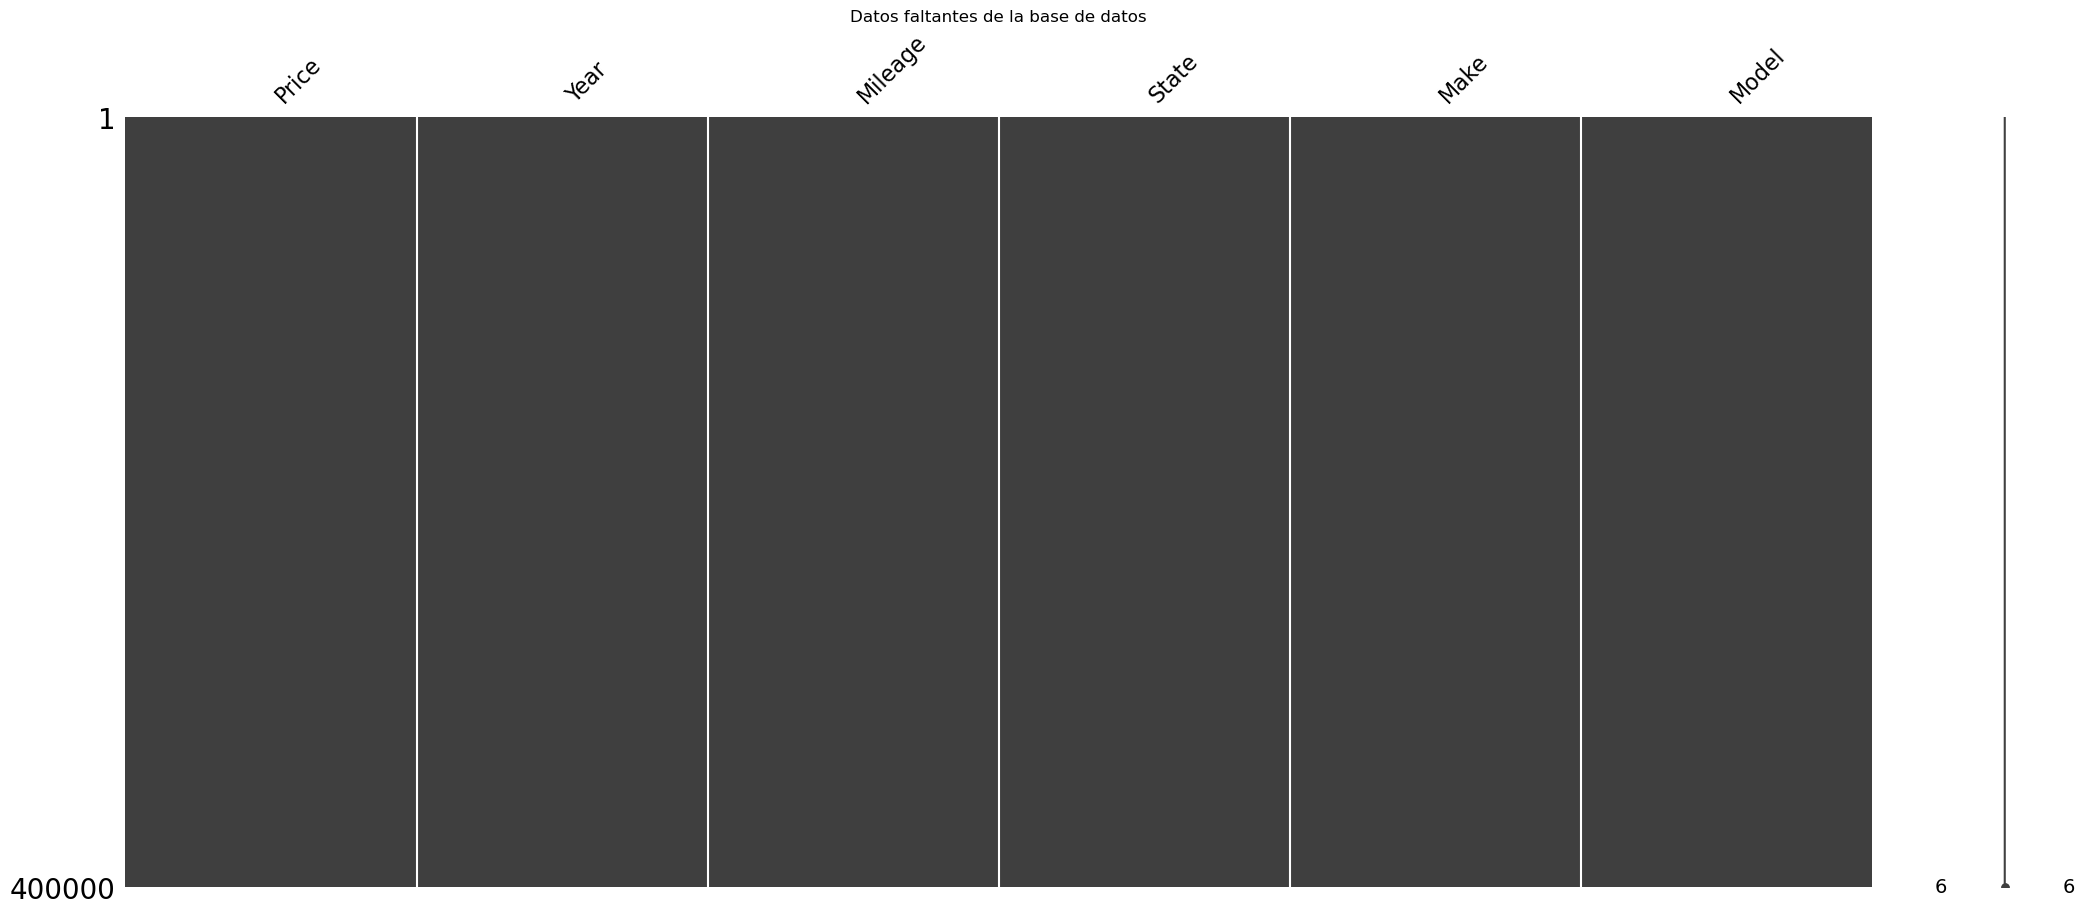

In [16]:
msno.matrix(dataTraining)
plt.title('Datos faltantes de la base de datos')
plt.show()

In [17]:
dataTraining.describe()

,Price,Year,Mileage,State,Make,Model
count,400000.000000,400000.000000,4.000000e+05,400000.00000,400000.000000,400000.000000
mean,21146.919312,2013.198125,5.507296e+04,14.96114,9.070550,141.388242
std,10753.664940,3.292326,4.088102e+04,12.35909,6.995047,121.688564
min,5001.000000,1997.000000,5.000000e+00,0.00000,0.000000,0.000000
25%,13499.000000,2012.000000,2.584100e+04,3.00000,3.000000,45.000000
50%,18450.000000,2014.000000,4.295500e+04,13.00000,9.000000,104.000000
75%,26999.000000,2016.000000,7.743300e+04,24.00000,13.000000,211.000000
max,79999.000000,2018.000000,2.457832e+06,50.00000,37.000000,524.000000


In [18]:
y = dataTraining['Price']
X = dataTraining.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X


,Year,Mileage,State,Make,Model
0,2017,9913,0,0,0
1,2015,20578,1,1,1
2,2012,83716,2,2,2
3,2014,28729,1,3,3
4,2013,64032,3,0,0
...,...,...,...,...,...
399995,2015,25287,2,23,278
399996,2015,17677,28,1,103
399997,2014,66688,13,6,118
399998,2014,37872,33,8,11


In [22]:
param_grid = {
    'max_depth': [10, 20, 30],
    'max_features': ['sqrt', 'log2', 0.5],
    'n_estimators': [50, 100, 200]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print("RMSE (Mejor Random Forest):", rmse_best_rf)
print("MAE (Mejor Random Forest):", mae_best_rf)

Mejores parámetros: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 200}
RMSE (Mejor Random Forest): 3989.876526757197
MAE (Mejor Random Forest): 2575.021403216333


In [20]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'gamma': [0, 0.1, 0.5, 1],               
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0] 
}


xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, max_depth=5)


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)


grid_search.fit(X_train, y_train)


best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluación del mejor modelo
y_pred_best_xgb = best_model.predict(X_test)
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)

print("Mejores parámetros encontrados:", best_parameters)
print("RMSE (Mejor XGBoost):", rmse_best_xgb)
print("MAE (Mejor XGBoost):", mae_best_xgb)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Mejores parámetros encontrados: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.3}
RMSE (Mejor XGBoost): 4254.639203901381
MAE (Mejor XGBoost): 2894.125845964374


In [23]:
param_grid = {
    'n_estimators': [5, 8, 10, 12]   
}
max_features = int(np.log2(X_train.shape[1])) 

bagreg = BaggingRegressor(
    DecisionTreeRegressor(max_features=max_features),
    bootstrap=True,
    oob_score=True,
    random_state=1
)
grid_search = GridSearchCV(estimator=bagreg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)


grid_search.fit(X_train, y_train)

best_parameters_bag = grid_search.best_params_
best_model_bag = grid_search.best_estimator_

# Evaluación del mejor modelo
y_pred_best_bag = best_model_bag.predict(X_test)
rmse_best_bag = np.sqrt(mean_squared_error(y_test, y_pred_best_bag))
mae_best_bag = mean_absolute_error(y_test, y_pred_best_bag)

print("Mejores parámetros encontrados:", best_parameters_bag)
print("RMSE (Mejor Bagging):", rmse_best_bag)
print("MAE (Mejor Bagging):", mae_best_bag)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mejores parámetros encontrados: {'n_estimators': 12}
RMSE (Mejor Bagging): 4179.343599138724
MAE (Mejor Bagging): 2705.332877250559


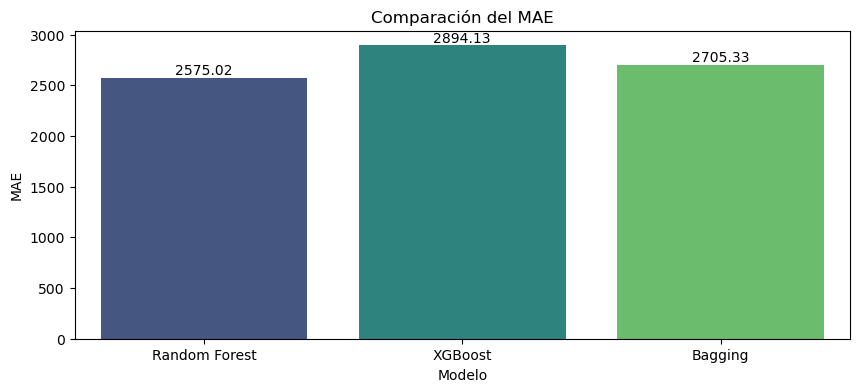

In [24]:
def add_labels(plots):
    for bar in plots.patches:
        
      plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
def graficar(x, y, medida_desempeño):
    df = pd.DataFrame({'Modelo': x, medida_desempeño: y})

    plt.figure(figsize=(10, 4))
    plots = sns.barplot(x='Modelo', y= medida_desempeño, data=df, palette="viridis")
    add_labels(plots)
    plt.title(f'Comparación del {medida_desempeño}')
    plt.show()
ejeX = ['Random Forest', 'XGBoost', 'Bagging']
ejeY = [mae_best_rf,mae_best_xgb,mae_best_bag]
graficar(ejeX, ejeY, 'MAE')

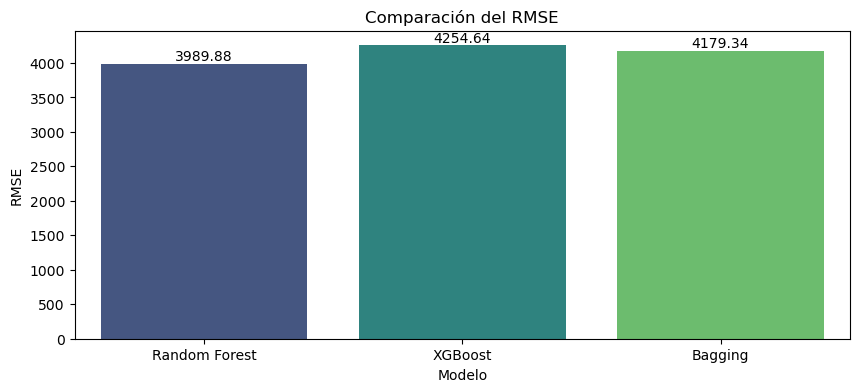

In [25]:
ejeX = ['Random Forest', 'XGBoost', 'Bagging']
ejeY = [rmse_best_rf,rmse_best_xgb,rmse_best_bag]
graficar(ejeX, ejeY, 'RMSE')

In [26]:
import joblib
modelo = RandomForestRegressor(random_state=42,max_depth = 30, n_estimators = 200)
modelo.fit(X_train, y_train)
joblib.dump(modelo, 'regresion.pkl', compress=3)

['regresion.pkl']

In [27]:
y_pred_comp = modelo.predict(dataTesting)
y_pred_comp = pd.DataFrame(y_pred_comp, index=dataTesting.index, columns=['Price'])
y_pred_comp.to_csv('test_submission.csv', index_label='ID')
y_pred_comp.head()

,Price
ID,
0,22560.755833
1,36518.495000
2,23596.615000
3,8982.635000
4,31092.811605


In [ ]:
#!pip install flask_restx
#!pip install flask_cors
#!pip install flask

from flask import Flask
from flask_restx import Api, Resource
import joblib
from flask_cors import CORS


app = Flask(__name__)
CORS(app)
api = Api(app)

parser = api.parser()
parser.add_argument('year', type=int, required=True, help='year', location='args')
parser.add_argument('mileage', type=int, required=True, help='Mileage', location='args')
parser.add_argument('State', type=int, required=True,
                    help='Ingrese el numero correspondiente al estado o State:     FL    : 0,      OH    : 1,      TX    : 2,      CO    : 3,      ME    : 4,      WA    : 5,      CT    : 6,      CA    : 7,      LA    : 8,      NY    : 9,      PA    : 10,      SC    : 11,      ND    : 12,      NC    : 13,      GA    : 14,      AZ    : 15,      TN    : 16,      KY    : 17,      NJ    : 18,      UT    : 19,      IA    : 20,      AL    : 21,      NE    : 22,      IL    : 23,      OK    : 24,      MD    : 25,      NV    : 26,      WV    : 27,      MI    : 28,      VA    : 29,      WI    : 30,      MA    : 31,      OR    : 32,      IN    : 33,      NM    : 34,      MO    : 35,      HI    : 36,      KS    : 37,      AR    : 38,      MN    : 39,      MS    : 40,      MT    : 41,      AK    : 42,      VT    : 43,      SD    : 44,      NH    : 45,      DE    : 46,      ID    : 47,      RI    : 48,      WY    : 49,      DC    : 50',
                    location='args')
parser.add_argument('Make', type=int, required=True,
                    help='Ingrese el numero correspondiente a la marca o make : Jeep    : 0,     Chevrolet    : 1,     BMW    : 2,     Cadillac    : 3,     Mercedes-Benz    : 4,     Toyota    : 5,     Buick    : 6,     Dodge    : 7,     Volkswagen    : 8,     GMC    : 9,     Ford    : 10,     Hyundai    : 11,     Mitsubishi    : 12,     Honda    : 13,     Nissan    : 14,     Mazda    : 15,     Volvo    : 16,     Kia    : 17,     Subaru    : 18,     Chrysler    : 19,     INFINITI    : 20,     Land    : 21,     Porsche    : 22,     Lexus    : 23,     MINI    : 24,     Lincoln    : 25,     Audi    : 26,     Ram    : 27,     Mercury    : 28,     Tesla    : 29,     FIAT    : 30,     Acura    : 31,     Scion    : 32,     Pontiac    : 33,     Jaguar    : 34,     Bentley    : 35,     Suzuki    : 36,     Freightliner    : 37',
                    location='args')
parser.add_argument('Model', type=int, required=True,
                    help='Ingrese el numero correspondiente al modelo o model :  Wrangler: 0     Tahoe4WD: 1     X5AWD: 2     SRXLuxury: 3     3: 4     C-ClassC300: 5     CamryL: 6     TacomaPreRunner: 7     LaCrosse4dr: 8     ChargerSXT: 9     CamryLE: 10     Jetta: 11     AcadiaFWD: 12     EscapeSE: 13     SonataLimited: 14     Santa: 15     Outlander: 16     CruzeSedan: 17     Civic: 18     CorollaL: 19     350Z2dr: 20     EdgeSEL: 21     F-1502WD: 22     FocusSE: 23     PatriotSport: 24     Accord: 25     MustangGT: 26     FusionHybrid: 27     ColoradoCrew: 28     Wrangler4WD: 29     CR-VEX-L: 30     CTS: 31     CherokeeLimited: 32     Yukon: 33     Elantra: 34     New: 35     CorollaLE: 36     Canyon4WD: 37     Golf: 38     Sonata4dr: 39     Elantra4dr: 40     PatriotLatitude: 41     Mazda35dr: 42     Tacoma2WD: 43     Corolla4dr: 44     Silverado: 45     TerrainFWD: 46     EscapeFWD: 47     Grand: 48     RAV4FWD: 49     Liberty4WD: 50     FocusTitanium: 51     DurangoAWD: 52     S60T5: 53     CivicLX: 54     MuranoAWD: 55     ForteEX: 56     TraverseAWD: 57     CamaroConvertible: 58     Sportage2WD: 59     Pathfinder4WD: 60     Highlander4dr: 61     WRXSTI: 62     Ram: 63     F-150XLT: 64     SiennaXLE: 65     LaCrosseFWD: 66     RogueFWD: 67     CamaroCoupe: 68     JourneySXT: 69     AccordEX-L: 70     Escape4WD: 71     OptimaEX: 72     FusionSE: 73     5: 74     F-150SuperCrew: 75     200Limited: 76     Malibu: 77     CompassSport: 78     G37: 79     CanyonCrew: 80     Malibu1LT: 81     MustangPremium: 82     MustangBase: 83     Sierra: 84     FlexLimited: 85     Tahoe2WD: 86     Transit: 87     Outback2.5i: 88     TucsonLimited: 89     Rover: 90     CayenneAWD: 91     MalibuLT: 92     TucsonFWD: 93     F-150FX2: 94     Camaro2dr: 95     Colorado4WD: 96     SonataSE: 97     ESES: 98     EnclavePremium: 99     CR-VEX: 100     F-150STX: 101     Impreza: 102     EquinoxFWD: 103     Cooper: 104     Super: 105     Passat4dr: 106     911: 107     CivicEX: 108     CamrySE: 109     Highlander4WD: 110     Corvette2dr: 111     200S: 112     PilotLX: 113     SorentoEX: 114     RioLX: 115     ExplorerXLT: 116     CorvetteCoupe: 117     EnclaveLeather: 118     Avalanche4WD: 119     TacomaBase: 120     Versa5dr: 121     MKXFWD: 122     SL-ClassSL500: 123     VeracruzFWD: 124     CorollaS: 125     PriusTwo: 126     CR-V2WD: 127     Lucerne4dr: 128     4Runner4dr: 129     PilotTouring: 130     CR-VLX: 131     CompassLatitude: 132     Altima4dr: 133     OptimaLX: 134     Focus5dr: 135     Charger4dr: 136     AcadiaAWD: 137     JourneyFWD: 138     7: 139     RX: 140     MalibuLS: 141     LSLS: 142     SportageLX: 143     Yukon4WD: 144     SorentoLX: 145     TiguanSEL: 146     Camry4dr: 147     F-1504WD: 148     PriusBase: 149     AccordLX: 150     Q7quattro: 151     ExplorerLimited: 152     4RunnerSR5: 153     OdysseyEX-L: 154     C-ClassC: 155     CX-9FWD: 156     JourneyAWD: 157     Sorento2WD: 158     F-250Lariat: 159     Prius: 160     TahoeLT: 161     25004WD: 162     Escalade4dr: 163     GTI4dr: 164     4RunnerRWD: 165     FX35AWD: 166     XC90T6: 167     Taurus4dr: 168     AvalonXLE: 169     300300S: 170     G35: 171     F-150Platinum: 172     TerrainAWD: 173     GXGX: 174     MKXAWD: 175     Town: 176     CamryXLE: 177     VeracruzAWD: 178     FusionS: 179     Challenger2dr: 180     Tundra: 181     Navigator4WD: 182     Legacy3.6R: 183     GS: 184     E-ClassE350: 185     Suburban2WD: 186     A44dr: 187     RegalTurbo: 188     Outback3.6R: 189     4Runner4WD: 190     Legacy2.5i: 191     1: 192     Yukon2WD: 193     Explorer: 194     PilotEX-L: 195     200LX: 196     M-ClassML350: 197     RAV4XLE: 198     WranglerSport: 199     Model: 200     FJ: 201     Titan: 202     Titan4WD: 203     FlexSEL: 204     OdysseyTouring: 205     SorentoSX: 206     RAV4Base: 207     OdysseyEX: 208     Explorer4WD: 209     Mustang2dr: 210     EdgeLimited: 211     FusionSEL: 212     Yukon4dr: 213     Touareg4dr: 214     Matrix5dr: 215     CTCT: 216     CherokeeSport: 217     6: 218     Maxima4dr: 219     Frontier4WD: 220     PriusThree: 221     F-350XL: 222     500Pop: 223     RDXAWD: 224     Tacoma4WD: 225     Optima4dr: 226     Q5quattro: 227     X3xDrive28i: 228     RDXFWD: 229     X5xDrive35i: 230     Malibu4dr: 231     ExpeditionXLT: 232     Ranger2WD: 233     Patriot4WD: 234     Quest4dr: 235     TaurusSE: 236     PathfinderS: 237     Murano2WD: 238     LS: 239     SiennaLimited: 240     ES: 241     SiennaLE: 242     F-150Lariat: 243     Titan2WD: 244     Durango2WD: 245     Tahoe4dr: 246     Focus4dr: 247     YarisBase: 248     TaurusLimited: 249     RAV44WD: 250     C-Class4dr: 251     Soul+: 252     TundraBase: 253     Expedition: 254     ImpalaLT: 255     SedonaLX: 256     Sequoia4WD: 257     ElantraLimited: 258     15002WD: 259     Suburban4WD: 260     FiestaSE: 261     15004WD: 262     TundraSR5: 263     Camry: 264     RAV4Limited: 265     RangerSuperCab: 266     MDXAWD: 267     RAV4LE: 268     ChallengerR/T: 269     FlexSE: 270     ForteLX: 271     TraverseFWD: 272     LibertySport: 273     ISIS: 274     Impala4dr: 275     Tundra4WD: 276     F-250XLT: 277     RXRX: 278     Armada2WD: 279     Frontier: 280     WranglerRubicon: 281     EquinoxAWD: 282     PilotEX: 283     TiguanS: 284     EscaladeAWD: 285     DTS4dr: 286     Pilot2WD: 287     Express: 288     PacificaLimited: 289     CanyonExtended: 290     MX5: 291     EscapeS: 292     IS: 293     C-ClassC350: 294     Compass4WD: 295     SportageEX: 296     Legacy: 297     E-ClassE: 298     Dakota4WD: 299     300300C: 300     Forte: 301     SportageAWD: 302     TaurusSEL: 303     Xterra4WD: 304     GSGS: 305     Explorer4dr: 306     F-150XL: 307     SportageSX: 308     xB5dr: 309     TundraLimited: 310     CruzeLT: 311     Wrangler2dr: 312     HighlanderFWD: 313     Sprinter: 314     Highlander: 315     Prius5dr: 316     CX-9Grand: 317     CTS4dr: 318     Econoline: 319     AccordEX: 320     RAV4Sport: 321     35004WD: 322     ChargerSE: 323     OdysseyLX: 324     TucsonAWD: 325     CX-7FWD: 326     AccordLX-S: 327     Navigator4dr: 328     EscapeXLT: 329     TiguanSE: 330     Cayman2dr: 331     TaurusSHO: 332     F-150FX4: 333     Ranger4WD: 334     OptimaSX: 335     SequoiaSR5: 336     G64dr: 337     HighlanderLimited: 338     ExplorerFWD: 339     F-350King: 340     PriusFive: 341     Yaris4dr: 342     PatriotLimited: 343     Lancer4dr: 344     HighlanderSE: 345     CompassLimited: 346     S2000Manual: 347     F-250King: 348     Forester2.5X: 349     Fusion4dr: 350     Frontier2WD: 351     FocusST: 352     Pathfinder2WD: 353     Sentra4dr: 354     XF4dr: 355     F-250XL: 356     PacificaTouring: 357     MustangDeluxe: 358     Caliber4dr: 359     GTI2dr: 360     Mazda34dr: 361     FocusS: 362     Sienna5dr: 363     CR-V4WD: 364     CX-9Touring: 365     Mazda64dr: 366     Forester4dr: 367     1500Tradesman: 368     MDX4WD: 369     Escalade: 370     TL4dr: 371     CX-9AWD: 372     Canyon2WD: 373     A64dr: 374     A8: 375     Armada4WD: 376     Impreza2.0i: 377     GX: 378     QX564WD: 379     CC4dr: 380     MKZ4dr: 381     Yaris: 382     FitSport: 383     Regal4dr: 384     Tundra2WD: 385     X3AWD: 386     SonicSedan: 387     Cobalt4dr: 388     RidgelineRTL: 389     CivicSi: 390     AvalonLimited: 391     XC90FWD: 392     Outlander2WD: 393     RAV44dr: 394     ColoradoExtended: 395     ExpeditionLimited: 396     3004dr: 397     200Touring: 398     SC: 399     X1xDrive28i: 400     SonicHatch: 401     GLI4dr: 402     PilotSE: 403     Savana: 404     RegalPremium: 405     CR-VSE: 406     RegalGS: 407     XC90AWD: 408     EdgeSport: 409     PriusFour: 410     SiennaSE: 411     1500Laramie: 412     300Base: 413     Pilot4WD: 414     A34dr: 415     HighlanderBase: 416     Expedition4WD: 417     STS4dr: 418     SoulBase: 419     Xterra2WD: 420     CT: 421     tC2dr: 422     Tiguan2WD: 423     CR-ZEX: 424     MustangShelby: 425     C702dr: 426     WranglerX: 427     WranglerSahara: 428     DurangoSXT: 429     Sequoia4dr: 430     Outlander4WD: 431     Expedition2WD: 432     Navigator: 433     9112dr: 434     Vibe4dr: 435     F-150King: 436     300Limited: 437     XC60T6: 438     CivicEX-L: 439     Avalanche2WD: 440     F-350XLT: 441     ExplorerBase: 442     MuranoS: 443     LXLX: 444     EdgeSE: 445     ImpalaLS: 446     Land: 447     E-ClassE320: 448     Milan4dr: 449     Boxster2dr: 450     RAV4: 451     Eos2dr: 452     SedonaEX: 453     xD5dr: 454     Colorado2WD: 455     Monte: 456     Escape4dr: 457     LX: 458     FiestaS: 459     F-350Lariat: 460     Galant4dr: 461     TT2dr: 462     Xterra4dr: 463     SequoiaLimited: 464     4RunnerLimited: 465     Genesis: 466     Suburban4dr: 467     EnclaveConvenience: 468     LaCrosseAWD: 469     Versa4dr: 470     Cobalt2dr: 471     XC60FWD: 472     F-150Limited: 473     Dakota2WD: 474     S44dr: 475     4Runner2WD: 476     Sedona4dr: 477     RidgelineSport: 478     TSXAutomatic: 479     ImprezaSport: 480     SLK-ClassSLK350: 481     Accent4dr: 482     CorvetteConvertible: 483     Avalon4dr: 484     Passat: 485     25002WD: 486     ExplorerEddie: 487     LibertyLimited: 488     CTS-V: 489     4RunnerTrail: 490     Eclipse3dr: 491     Azera4dr: 492     TahoeLS: 493     Continental: 494     XJ4dr: 495     ForteSX: 496     SequoiaPlatinum: 497     FocusSEL: 498     Durango4dr: 499     CamryBase: 500     XC704dr: 501     S804dr: 502     Element4WD: 503     YarisLE: 504     WRXBase: 505     TLAutomatic: 506     AvalonTouring: 507     XK2dr: 508     PT: 509     PathfinderSE: 510     300Touring: 511     Navigator2WD: 512     XC60AWD: 513     EscapeLimited: 514     WRXLimited: 515     AccordSE: 516     QX562WD: 517     Escalade2WD: 518     EscapeLImited: 519     PriusOne: 520     Element2WD: 521     Excursion137\: 522     WRXPremium: 523     RX-84dr: 524',
                    location='args')



def process_request(year, mileage, State, Make, Model):
    modelo_regresion = joblib.load('regresion.pkl')
    features = [[year, mileage, State, Make, Model]]
    prediccion = modelo_regresion.predict(features)
    prediccion_json = prediccion.tolist()
    return prediccion_json


# Clase para la API
class CarInfo(Resource):
    @api.expect(parser)
    def get(self):
        args = parser.parse_args()
        year = args['year']
        mileage = args['mileage']
        State = args['State']
        Make = args['Make']
        Model = args['Model']
        result = process_request(year, mileage, State, Make, Model)
        return {
            'description': f"el precio es : {result} year: {year}, Mileage: {mileage}, State: {State}, Make: {Make}, Model: {Model}",
            'result': result}


# Agregar la clase de la API al endpoint
api.add_resource(CarInfo, '/car_info')

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.3:5000
Press CTRL+C to quit
127.0.0.1 - - [28/Apr/2024 16:25:54] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2024 16:25:54] "GET /swaggerui/swagger-ui.css HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2024 16:25:54] "GET /swaggerui/droid-sans.css HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2024 16:25:54] "GET /swaggerui/swagger-ui-bundle.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2024 16:25:54] "GET /swaggerui/swagger-ui-standalone-preset.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2024 16:25:54] "GET /swagger.json HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2024 16:25:54] "GET /swaggerui/favicon-32x32.png HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2024 16:26:47] "GET /car_info?year=2020&mileage=2000&State=0&Make=0&Model=0 HTTP/1.1" 200 -
